## Exploratory Data Analysis:

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('./cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          467 non-null    object 
 1   Home/Away     467 non-null    object 
 2   Opp           467 non-null    object 
 3   MP_G          467 non-null    int64  
 4   FG_G          467 non-null    int64  
 5   FGA_G         467 non-null    int64  
 6   FG%_G         467 non-null    float64
 7   3P_G          467 non-null    int64  
 8   3PA_G         467 non-null    int64  
 9   3P%_G         467 non-null    float64
 10  FT_G          467 non-null    int64  
 11  FTA_G         467 non-null    int64  
 12  FT%_G         467 non-null    float64
 13  ORB_G         467 non-null    int64  
 14  DRB_G         467 non-null    int64  
 15  TRB_G         467 non-null    int64  
 16  AST_G         467 non-null    int64  
 17  STL_G         467 non-null    int64  
 18  BLK_G         467 non-null    

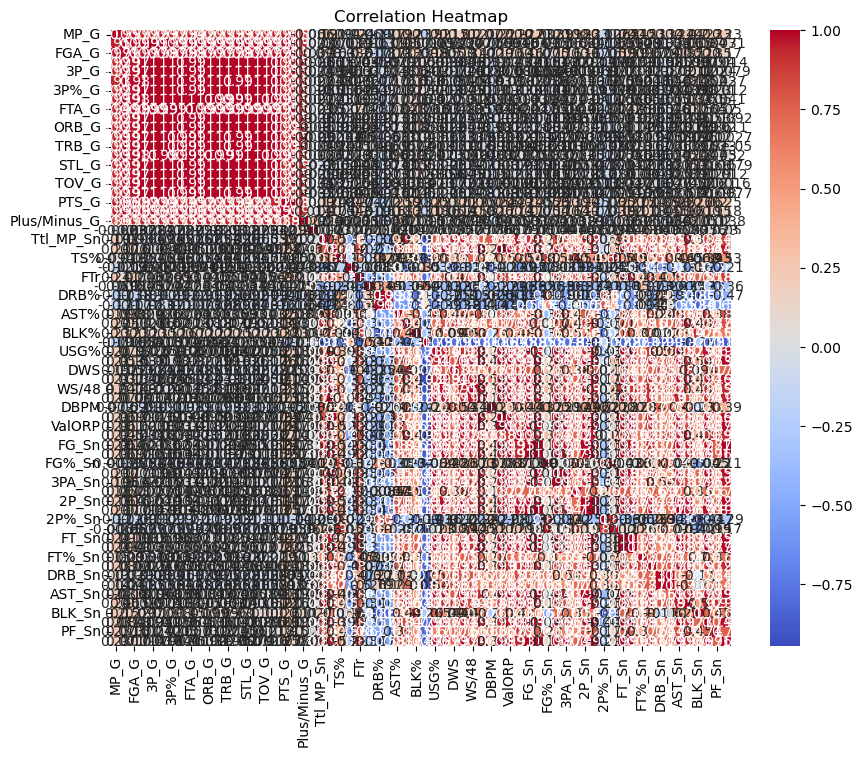

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Too many features here, let's cut it down a bit more and just look at averages and percentages

In [12]:
df.columns

Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'W/L_Margin', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn',
       '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn',
       'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn',
       'PF_Sn', 'PTS_Sn'],
      dtype='object')

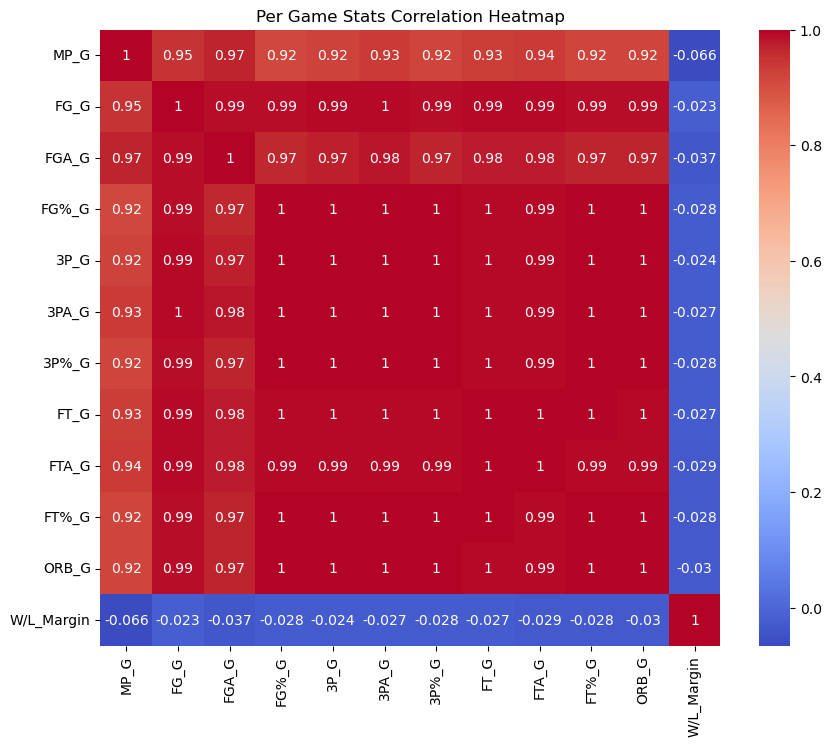

In [13]:
subset_features = ['MP_G', 'FG_G', 'FGA_G', 'FG%_G',
       '3P_G', '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'W/L_Margin']

plt.figure(figsize=(10, 8))
sns.heatmap(df[subset_features].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Per Game Stats Correlation Heatmap')
plt.savefig('Per_Game_Stats_Correlation_Heatmap.png')

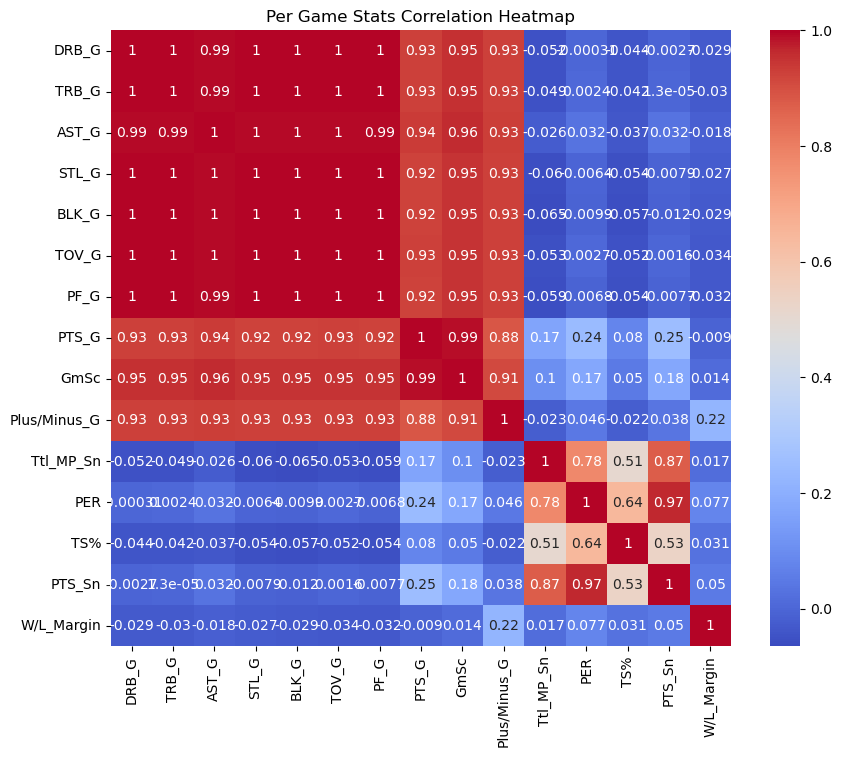

In [14]:
subset_2 = ['DRB_G',
       'TRB_G', 'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%', 'PTS_Sn', 'W/L_Margin']

plt.figure(figsize=(10, 8))
sns.heatmap(df[subset_2].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Per Game Stats Correlation Heatmap')
plt.savefig('Per_Game_Stats_Correlation_Heatmap.png')
plt.show()

Plus- Minus  low correlation with target
All of the per game stats have a high correlation with each other



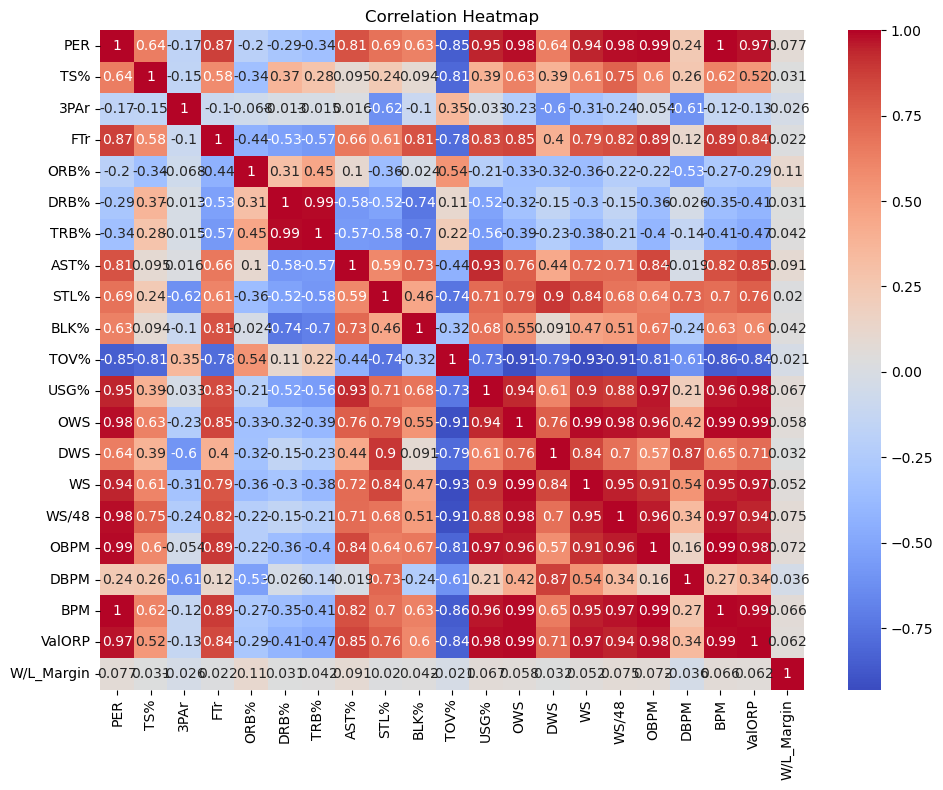

In [16]:
adv_stats_corr = ['PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'W/L_Margin']

plt.figure(figsize=(10, 8))
sns.heatmap(df[adv_stats_corr].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

- Advanced stas have low correlation with target
- PER has high correlation with a couple of other advanced stats. Makes sense because PER is an impact stat
- I will give the features to the feature seletor and hyper tune my model this way


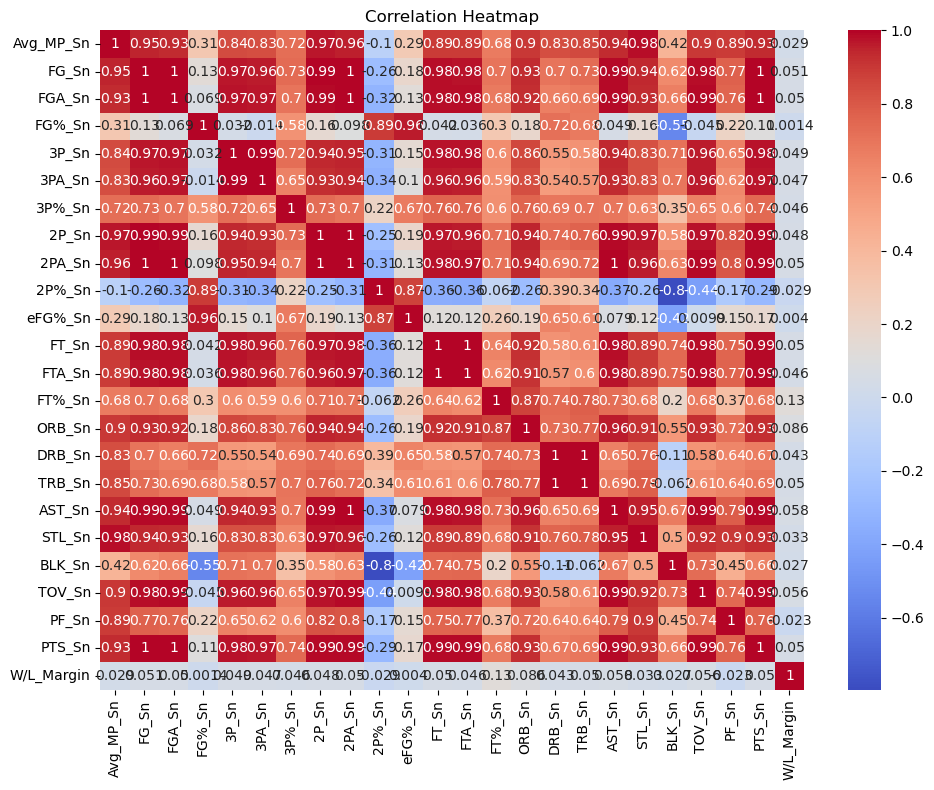

In [17]:
seasonal_corr = ['Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn',  '3P_Sn', '3PA_Sn',
       '3P%_Sn', '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn',
       'FT%_Sn', 'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn',
       'TOV_Sn', 'PF_Sn', 'PTS_Sn','W/L_Margin']

plt.figure(figsize=(10, 8))
sns.heatmap(df[seasonal_corr].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

None of the stats have a high correlation with the target

# Exploring Distributions

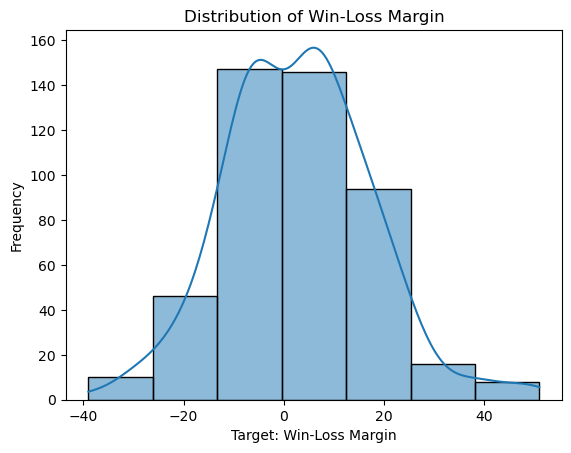

In [28]:
#Visualizing the distribution of the target variable


import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['W/L_Margin'], bins=7, kde=True)

plt.xlabel('Target: Win-Loss Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Win-Loss Margin')
plt.savefig('Distribution_of_Win_Loss_Margin.png')




The win-loss margin has some kurtosis to it and is slightly right skewed. This indicates there is some variability in the target and that there are more outliers in the distribution.

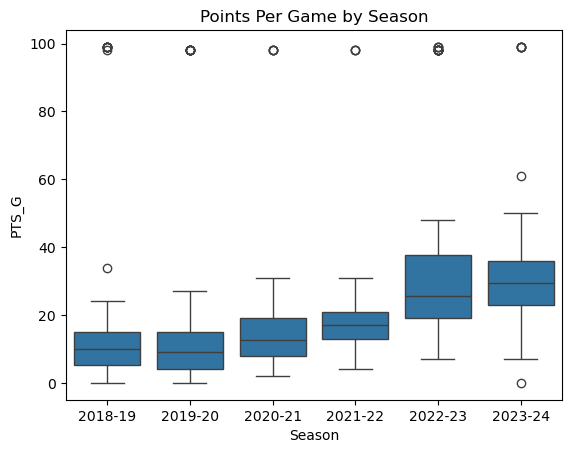

In [31]:
# Visualizing distribution of points per game by season
sns.boxplot(x='Season', y='PTS_G', data=df)
plt.title('Points Per Game by Season')
plt.savefig('Distribution_of_Points_Per_Game_by_Season.png')


The outliers close to 100 we're seeing are actually representations of when he  did not play in a game, that are represented as 98 and 99 in the dataset.

I'll remove these to see what the distribution actually looks like

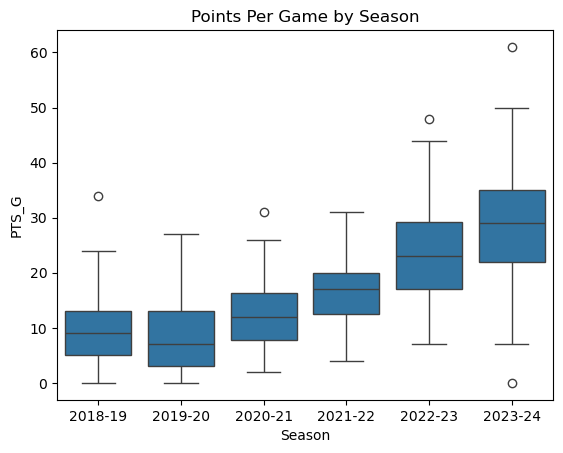

In [33]:


no_outliers = df[~df['PTS_G'].isin([98, 99])]
sns.boxplot(x='Season', y='PTS_G', data=no_outliers)
plt.title('Points Per Game by Season')
plt.savefig('Distribution_of_Points_Per_Game_by_Season.png')



The variability of PTS per game increases as he gets later in his career. His shooting average also nearly triples from his first season to his last. There is something to be sai about how Brunson's evolution as a player really sped up in the last 3 seasons. Let's see what else evolved over time.

** This could be marked as a limitation of the dataset because Brunson's evolution as a player does not necessarily match up with the way his team plays

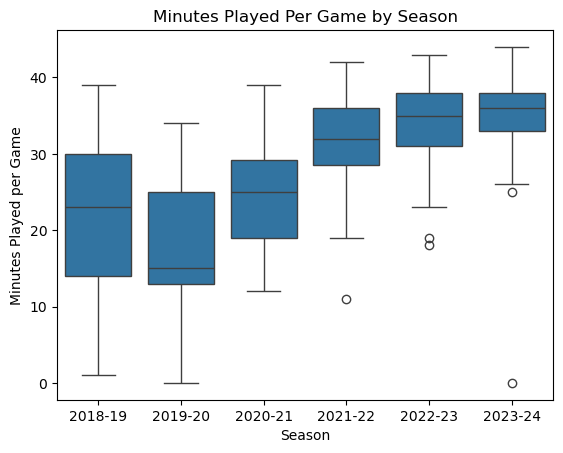

In [26]:

sns.boxplot(x='Season', y='MP_G', data=no_outliers)
plt.title('Minutes Played Per Game by Season')
plt.ylabel('Minutes Played per Game')
plt.savefig('Minutes_Played_Per_Game_by_Season.png')


There is a stark difference between the last 3 seasons and the first 3 seasons. The minutes he played varies a lot more in the first few season, but then stayed very consistent in the last 3 seasons. 

He also nearly doubled his time on the court in the last few seasons. This makes sense since he improved a lot as a player and proved to be a key player for the Knicks.

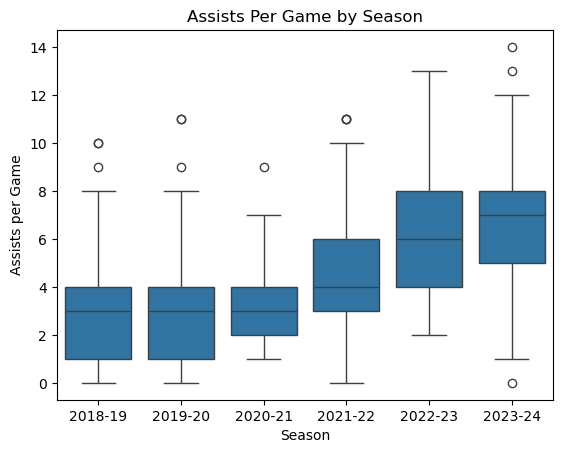

In [25]:

sns.boxplot(x='Season', y='AST_G', data=no_outliers)
plt.title('Assists Per Game by Season')
plt.ylabel('Assists per Game')
plt.savefig('Assists_Per_Game_by_Season.png')


Assists are an extremely important metric for a point guard since it points to being able to create opportunities for others to score. Brunson's assists per game increased over time especially dramatically in the last 3 seasons for the Knicks. 

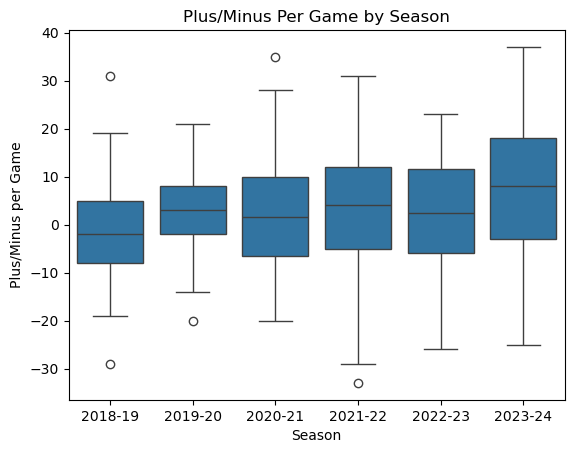

In [24]:

sns.boxplot(x='Season', y='Plus/Minus_G', data=no_outliers)
plt.title('Plus/Minus Per Game by Season')
plt.ylabel('Plus/Minus per Game')
plt.savefig('Plus_Minus_Per_Game_by_Season.png')


This is a very interesting visualization because it does not present what would be expected and does not follow the trend of other stats we've seen so far. 

Plus-Minus is a direct metric to measure how many points a player makes while on the court versus points made while he's off the court. The variance increases dramatically in his last 3 seasons when he plays with the Knicks. This adds up because it could mean that his teammates are really strong players even when he's off the court which could offset his impact when he's on the court.

This also reveals that his average plus minus went from negative to positive through his career. His impact has improved over time, which also points to his evolution as a player.

# Exploring Feature Relationships   

In [37]:
df['Played'] = df['PTS_G'].apply(lambda x: 'No' if x in [98, 99] else 'Yes')
df['Played'].value_counts()


Played
Yes    422
No      45
Name: count, dtype: int64

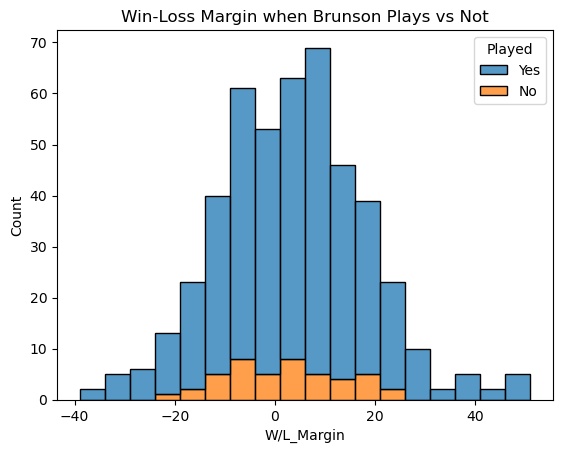

In [42]:
# What is the W/L Margin when Brunson plays vs not

sns.histplot(x='W/L_Margin', hue='Played', multiple='stack', data=df)
plt.title('Win-Loss Margin when Brunson Plays vs Not')
plt.savefig('Win_Loss_Margin_when_Brunson_Plays_vs_Not.png')




Text(0.5, 1.0, 'Points Per Game vs Win-Loss Margin')

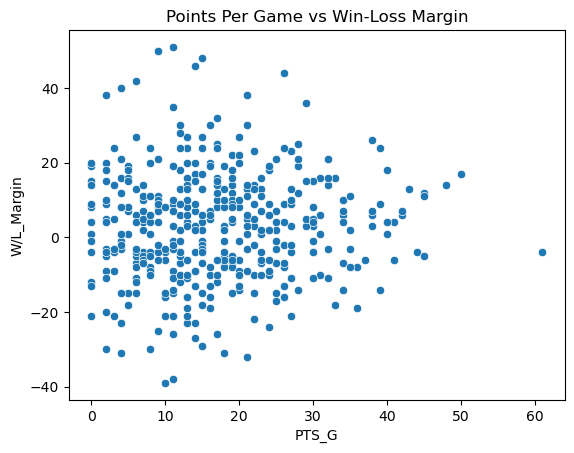

In [44]:
sns.scatterplot(x='PTS_G', y='W/L_Margin', data=no_outliers)
plt.title('Points Per Game vs Win-Loss Margin')


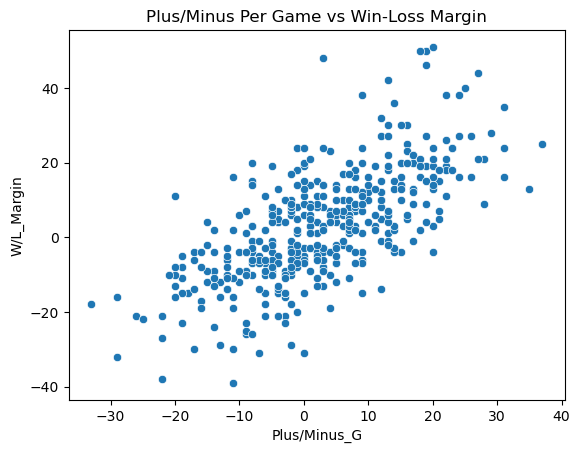

In [46]:
sns.scatterplot(x='Plus/Minus_G', y='W/L_Margin', data=no_outliers)
plt.title('Plus/Minus Per Game vs Win-Loss Margin')
plt.savefig('Plus_Minus_Per_Game_vs_Win_Loss_Margin.png')


Seeing a bit of a linear relationship here.

Text(0.5, 1.0, 'PER vs Win-Loss Margin')

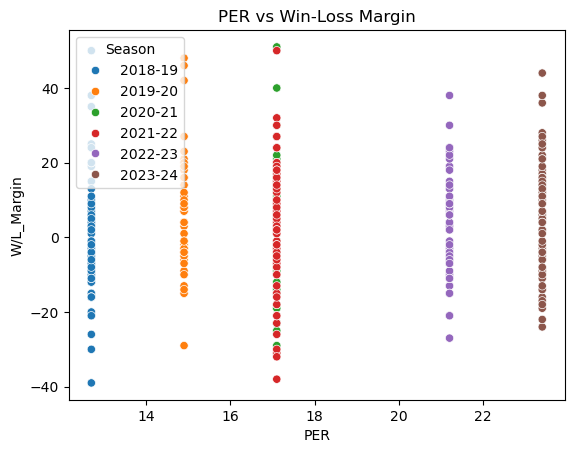

In [54]:
sns.scatterplot(x='PER', y='W/L_Margin', hue='Season',data=no_outliers)
plt.title('PER vs Win-Loss Margin')






His player efficiency rating is a non linear relationship but it shows us that it gets higher with each season of his career. It also shows that 2020-2022 was a transitional time for his performance which also showedin the distribution plots.

Text(0.5, 1.0, 'Assists Per Game vs Win-Loss Margin')

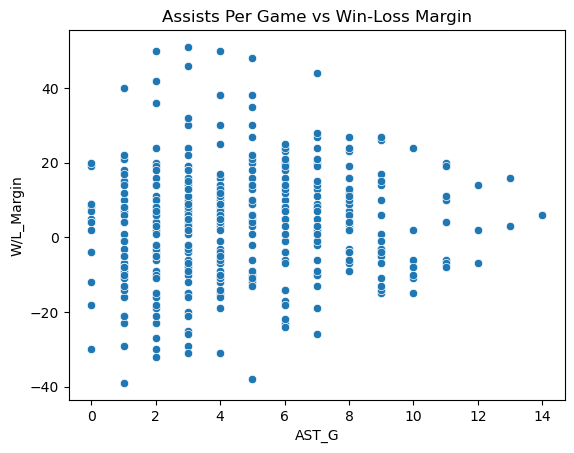

In [58]:
sns.scatterplot(x='AST_G', y='W/L_Margin',data=no_outliers)
plt.title('Assists Per Game vs Win-Loss Margin')



Text(0.5, 1.0, 'Steals Per Game vs Win-Loss Margin')

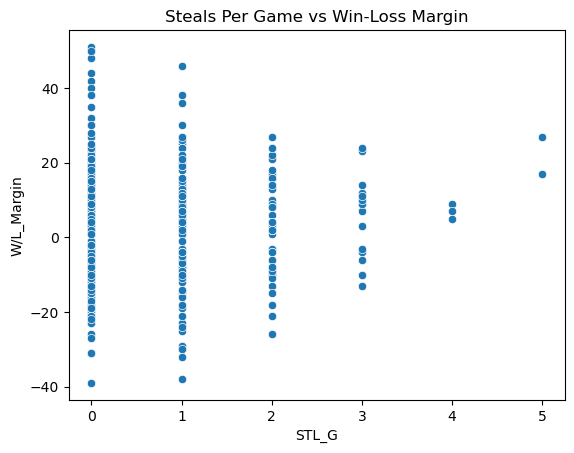

In [59]:
sns.scatterplot(x='STL_G', y='W/L_Margin',data=no_outliers)
plt.title('Steals Per Game vs Win-Loss Margin')




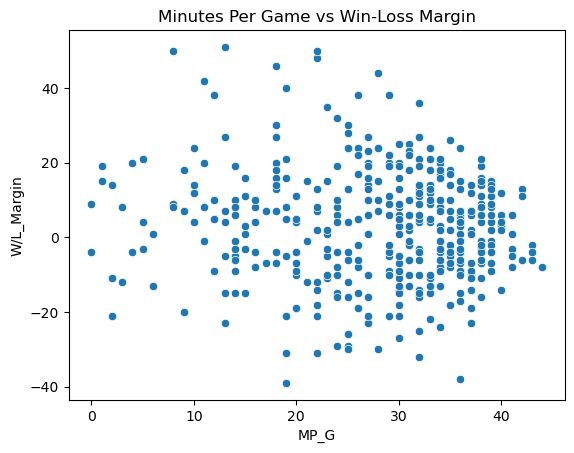

In [63]:
sns.scatterplot(x='MP_G', y='W/L_Margin',data=no_outliers)
plt.title('Minutes Per Game vs Win-Loss Margin')
plt.savefig('Minutes_Per_Game_vs_Win_Loss_Margin.png')


Theres a high concentraion of data points between 25 and 40 minutes. The speard of the win/loss margin becomes wider as the minutes played increases. This suggests that when Brunson plays more, there's more variabilit in the win/loss margin. This also suggests some other factors not included are at play here, such as the varying quality of opponents or teammates. But we can say that the longer he plays the more opportunity he has to influence a game. 